What are the parameters theta influencing activity? duration?

The parameters theta that can influence duration and vary depending on the specific activity.
 
1. Propose an algorithm to simulate the model in an EF for each value of parameters. 
2. Plot the activity and durations vs. parameter values.

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
class Neuron:
    def __init__(self, weights, threshold, leak):
        #We initialize neuron weights, threshold, and leak factor.
        self.weights = weights  #The strength of connections to other neurons
        self.threshold = threshold  #The minimum membrane potential required to "fire" and send an output spike
        self.leak = leak  #The rate at which the membrane potential decays over time
        self.membrane_potential = 0.0  #The current level of membrane potential

    def forward(self, inputs):
        #We definefunction forward and calculate the weighted sum of inputs.
        total = sum(w * x for w, x in zip(self.weights, inputs))

        #We accumulate the inputs over time by adding to the membrane potential.
        self.membrane_potential += total

        #Here we check if the threshold is reached,
        if self.membrane_potential >= self.threshold:
            #fire an output spike,
            output = 1
            #and reset the membrane potential.
            self.membrane_potential = 0.0
        else:
            #Here we compute the leak of the membrane potential over time.
            self.membrane_potential *= self.leak
            output = 0
        return output

In [4]:
class Layer:
    def __init__(self, weights, threshold, leak):
        #We initialize the layer with neurons.
        self.neurons = []
        for w in weights:
            #We create a neuron with given weights, threshold, and leak factor.
            self.neurons.append(Neuron(w, threshold, leak))

    def forward(self, inputs):
        #We define function forward, which execute the forward pass through the layer.
        outputs = []
        for neuron in self.neurons:
            #We compute the output of each neuron in the layer.
            output = neuron.forward(inputs)
            outputs.append(output)
        return outputs

In [5]:
class NeuralNetwork:
    def __init__(self, weights_hidden, weights_output, threshold_hidden, threshold_output, leak_hidden, leak_output):
        #We initialize the neural network with hidden layer and output layer.
        self.hidden_layer = Layer(weights_hidden, threshold_hidden, leak_hidden)
        self.output_layer = Layer(weights_output, threshold_output, leak_output)

    def forward(self, inputs):
        hidden_outputs = self.hidden_layer.forward(inputs)
        output_outputs = self.output_layer.forward(hidden_outputs)
        return output_outputs

    def simulate(self, theta_values):
        #We simulate the model for each theta value
        activity_list = []
        duration_list = []
        for theta in theta_values:
            #We update the parameters theta for each neuron in the network.
            for neuron in self.hidden_layer.neurons + self.output_layer.neurons:
                neuron.threshold = neuron.threshold * theta
                neuron.leak = neuron.leak * theta

            #We perform forward path through the network and obtain outputs.
            inputs = [1.0, 0.0]  # The input/data/voltage values
            outputs = self.forward(inputs)

            #We compute activity and duration,
            activity = sum(outputs)
            duration = len(outputs)

            #and store activity and duration for the current value of theta.
            activity_list.append(activity)
            duration_list.append(duration)

        return activity_list, duration_list

In [6]:
#We define the number of neurons per layer.
input_neurons = 2
hidden_neurons = 4
output_neurons = 2

#We define weights for the hidden layer.
hidden_weights = [
    [0.1, 0.2],  #Weights for neuron 1
    [0.1, 0.2],  #Weights for neuron 2
    [0.3, 0.2],  #Weights for neuron 3
    [0.4, 0.5]   #Weights for neuron 4
]

#We define weights for the output layer.
output_weights = [
    [0.3, 0.5, 0.2, 0.5],  #Weights for neuron 1
    [0.1, 0.4, 0.6, 0.3]   #Weights for neuron 2
]

#We define thresholds for the hidden and output layers
threshold_hidden = 0.5
threshold_output = 0.7

#We define leak factors for the hidden and output layers
leak_hidden = 0.8
leak_output = 0.9

#Weereate the neural network 
network = NeuralNetwork(hidden_weights, output_weights, threshold_hidden, threshold_output, leak_hidden, leak_output)

#Here we define the parameter values for theta.
theta_values = np.linspace(0, 1, 10)  #10 values between 0 and 1

#We simulate the model for each value of theta.
activity_list, duration_list = network.simulate(theta_values)

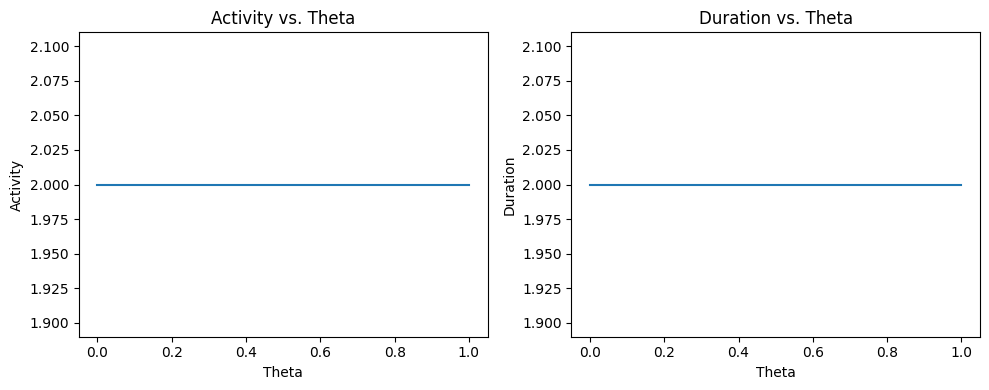

In [7]:
#We plot activity and duration against parameter values.
plt.figure(figsize=(10, 4))

#We plot activity
plt.subplot(1, 2, 1)  #We create a subplot with 1 row, 2 columns, and activate the first subplot
plt.plot(theta_values, activity_list)  #We plot theta_values on the x-axis and activity_list on the y-axis
plt.xlabel('Theta')  #We set the x-axis label,
plt.ylabel('Activity')  #and the y-axis label.
plt.title('Activity vs. Theta')  #We name it.

plt.subplot(1, 2, 2)  #Activate the second subplot.
plt.plot(theta_values, duration_list)  #Plot theta_values on the x-axis and duration_list on the y-axis.
plt.xlabel('Theta')  #We set the x-axis label,
plt.ylabel('Duration')  #and y-axis label.
plt.title('Duration vs. Theta') #We name the second one. 

plt.tight_layout()  #We adjust subplot parameters to give specified padding,
plt.show()  #and show the plot.